In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

Convert 'date' to datetime format, filter records from 2010 to 2015, reset the index, and confirm the final dataset shape and date range.

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[(df['date'].dt.year >= 2010) & (df['date'].dt.year <= 2015)]
df.reset_index(drop=True, inplace=True)

print(f"Final working data shape: {df.shape}")
print("Date range in dataset:", df['date'].min(), "to", df['date'].max())

Final working data shape: (12201, 13)
Date range in dataset: 2010-01-01 00:00:00 to 2015-12-12 00:00:00


Use For Checking The Top Rows.

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,582.0,02-03-2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,36.0,NaN,"GNC Toll Gate Tirumala , Chittoor Dist.",NaN,2010-02-03
1,582.0,02-05-2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,41.0,NaN,"GNC Toll Gate Tirumala , Chittoor Dist.",NaN,2010-02-05
2,582.0,02-09-2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,37.0,NaN,"GNC Toll Gate Tirumala , Chittoor Dist.",NaN,2010-02-09
3,582.0,02-11-2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,40.0,NaN,"GNC Toll Gate Tirumala , Chittoor Dist.",NaN,2010-02-11
4,582.0,03-03-2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,40.0,NaN,"GNC Toll Gate Tirumala , Chittoor Dist.",NaN,2010-03-03


In [7]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12201 entries, 0 to 12200
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   stn_code                     12201 non-null  float64       
 1   sampling_date                12201 non-null  object        
 2   state                        12201 non-null  object        
 3   location                     12201 non-null  object        
 4   agency                       12201 non-null  object        
 5   type                         12201 non-null  object        
 6   so2                          11981 non-null  float64       
 7   no2                          12007 non-null  float64       
 8   rspm                         12179 non-null  float64       
 9   spm                          367 non-null    float64       
 10  location_monitoring_station  12201 non-null  object        
 11  pm2_5                        0 non-null  

Visualize missing values across the dataset using a matrix plot for quick inspection.

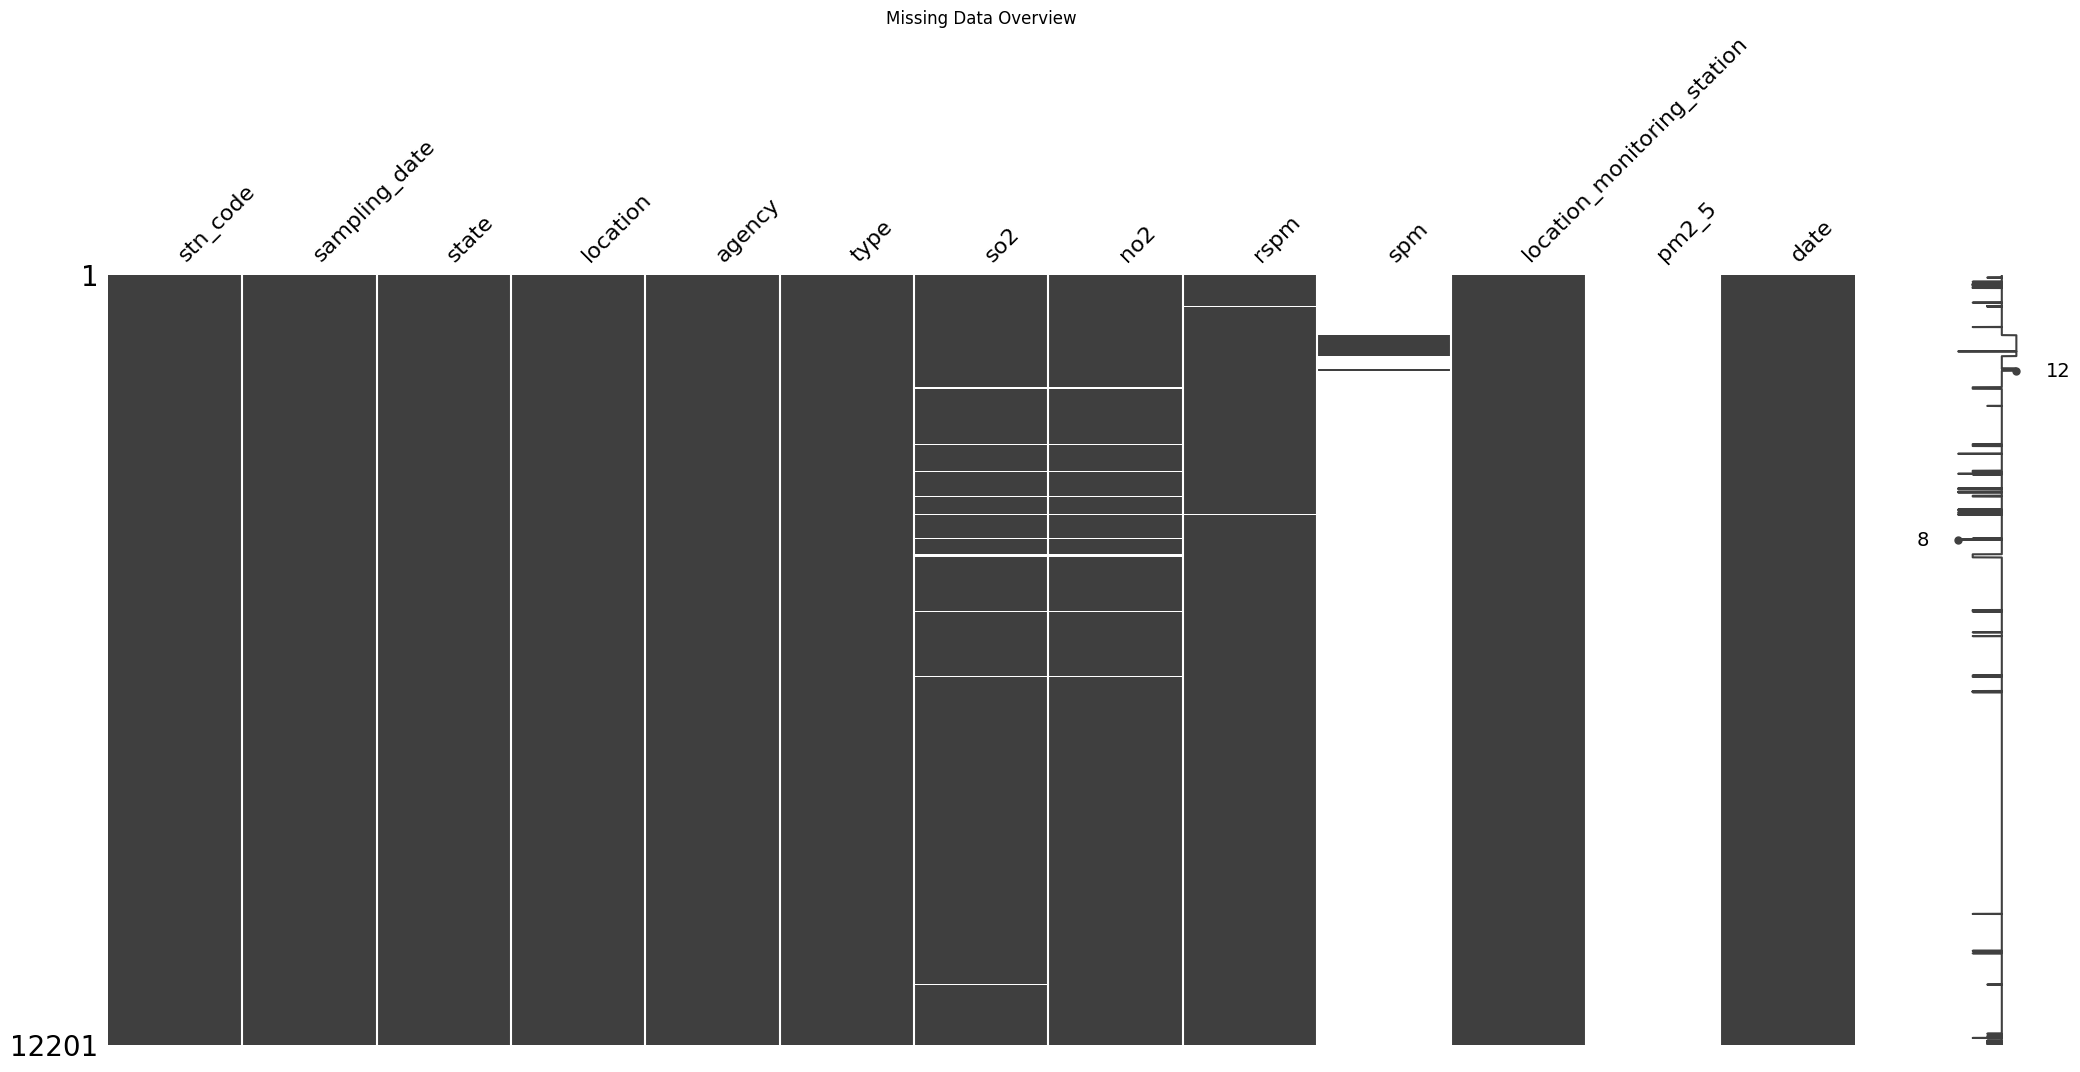

In [9]:
msno.matrix(df)
plt.title("Missing Data Overview")
plt.show()

In [10]:
df.isnull().sum()

,0
stn_code,0
sampling_date,0
state,0
location,0
agency,0
type,0
so2,220
no2,194
rspm,22
spm,11834


Use for Drop the 'pm2_5' column from the dataset.

In [11]:
df.drop('pm2_5', axis=1, inplace=True)

print(df.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'date'],
      dtype='object')


Fill missing 'so2', 'no2', 'rspm', 'spm' values with the average 'so2','no2','rspm', 'spm' level of their respective state.

In [12]:
df['so2'] = df['so2'].fillna(df.groupby('state')['so2'].transform('mean'))

In [13]:
df['no2'] = df['no2'].fillna(df.groupby('state')['no2'].transform('mean'))

In [14]:
df['rspm'] = df['rspm'].fillna(df.groupby('state')['rspm'].transform('mean'))

In [15]:
df['spm'] = df['spm'].fillna(df.groupby('state')['spm'].transform('mean'))

overall_spm_mean = df['spm'].mean()
df['spm'].fillna(overall_spm_mean, inplace=True)

<ipython-input-15-f4bf6fc0a17b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['spm'].fillna(overall_spm_mean, inplace=True)


In [16]:
df.isnull().sum()

,0
stn_code,0
sampling_date,0
state,0
location,0
agency,0
type,0
so2,0
no2,0
rspm,0
spm,0


In [17]:
df.to_csv('cleaned_air_pollution.csv', index=False)
print("\nData saved as 'cleaned_air_pollution.csv'")


Data saved as 'cleaned_air_pollution.csv'


In [18]:
df.shape

(12201, 12)

Convert both 'date' and 'sampling_date' columns into proper datetime format, handling errors gracefully.

In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')


In [20]:
df.columns.tolist()

['stn_code',
 'sampling_date',
 'state',
 'location',
 'agency',
 'type',
 'so2',
 'no2',
 'rspm',
 'spm',
 'location_monitoring_station',
 'date']

In [21]:
df.dtypes

,0
stn_code,float64
sampling_date,datetime64[ns]
state,object
location,object
agency,object
type,object
so2,float64
no2,float64
rspm,float64
spm,float64


In [22]:
df.nunique()

,0
stn_code,73
sampling_date,813
state,4
location,40
agency,5
type,3
so2,118
no2,254
rspm,406
spm,223


In [23]:
df.describe(include='all')

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
count,12201.000000,12201,12201,12201,12201,12201,12201.000000,12201.000000,12201.000000,12201.000000,12201,12201
unique,NaN,NaN,4,40,5,3,NaN,NaN,NaN,NaN,73,NaN
top,NaN,NaN,Andhra Pradesh,Guwahati,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN,"ITI Building, Gopinath Nagar, Guwahati",NaN
freq,NaN,NaN,6588,2441,6352,9539,NaN,NaN,NaN,NaN,525,NaN
mean,511.106057,2013-04-18 14:20:16.228178176,NaN,NaN,NaN,NaN,6.902250,16.896012,84.300738,207.074932,NaN,2013-04-18 14:20:16.228178176
min,95.000000,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,44.000000,NaN,2010-01-01 00:00:00
25%,462.000000,2012-04-01 00:00:00,NaN,NaN,NaN,NaN,5.000000,12.000000,52.000000,207.074932,NaN,2012-04-01 00:00:00
50%,541.000000,2013-07-01 00:00:00,NaN,NaN,NaN,NaN,6.000000,15.000000,71.000000,207.074932,NaN,2013-07-01 00:00:00
75%,596.000000,2014-09-07 00:00:00,NaN,NaN,NaN,NaN,7.080696,19.000000,104.000000,207.074932,NaN,2014-09-07 00:00:00
max,788.000000,2015-12-12 00:00:00,NaN,NaN,NaN,NaN,228.000000,155.000000,656.000000,445.000000,NaN,2015-12-12 00:00:00


Select numeric columns and plot a heatmap to visualize correlations between different pollutants.

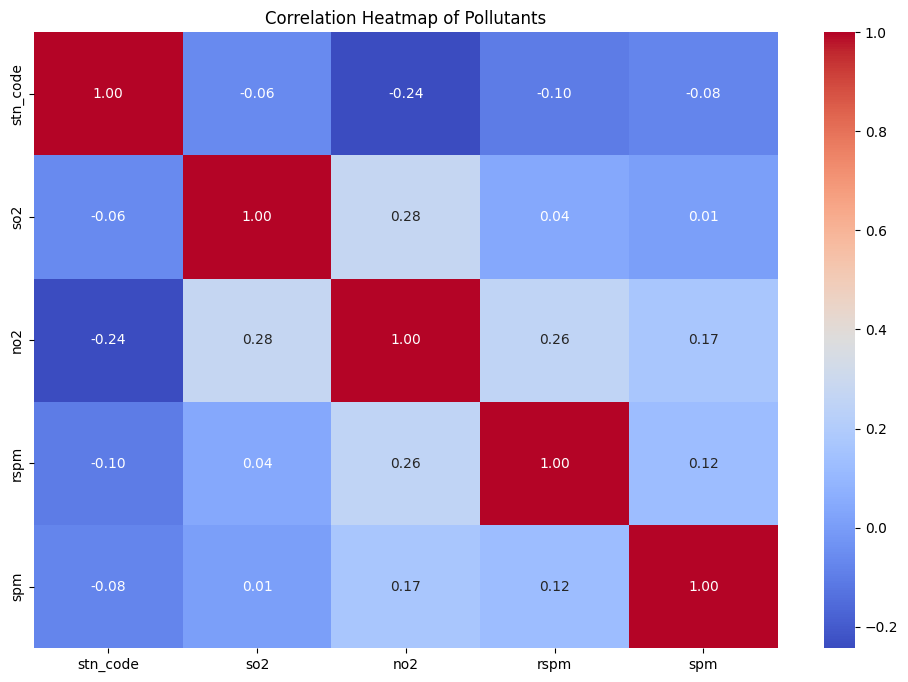

In [24]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Pollutants")
plt.show()

Generates a boxplot to visualize the distribution of pollutant concentrations (so2, no2, rspm, spm) from the dataframe df with customized title, axis labels, and grid.

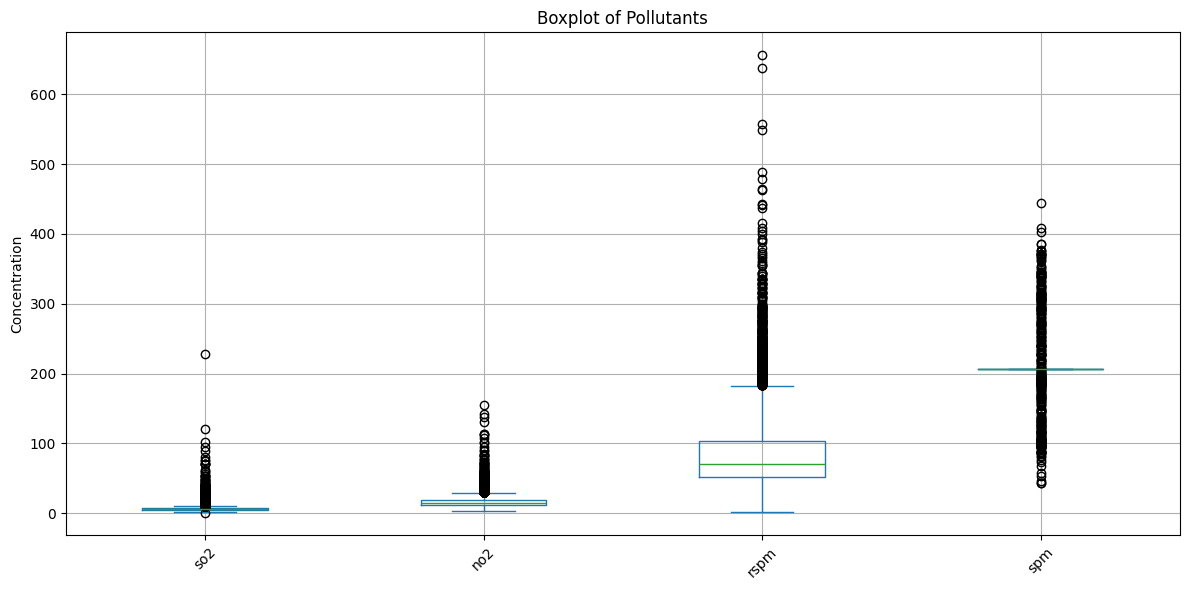

In [25]:
pollutants = ['so2', 'no2', 'rspm', 'spm']

df[pollutants].plot(kind='box', figsize=(12, 6), title="Boxplot of Pollutants", rot=45)
plt.ylabel("Concentration")
plt.grid(True)
plt.tight_layout()
plt.show()

Plots the monthly average concentrations of pollutants (so2, no2, rspm, spm) over time, using a resampled time series to show trends.

<ipython-input-26-ae53ee0d9291>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.set_index('date').resample('M')[pollutants].mean()


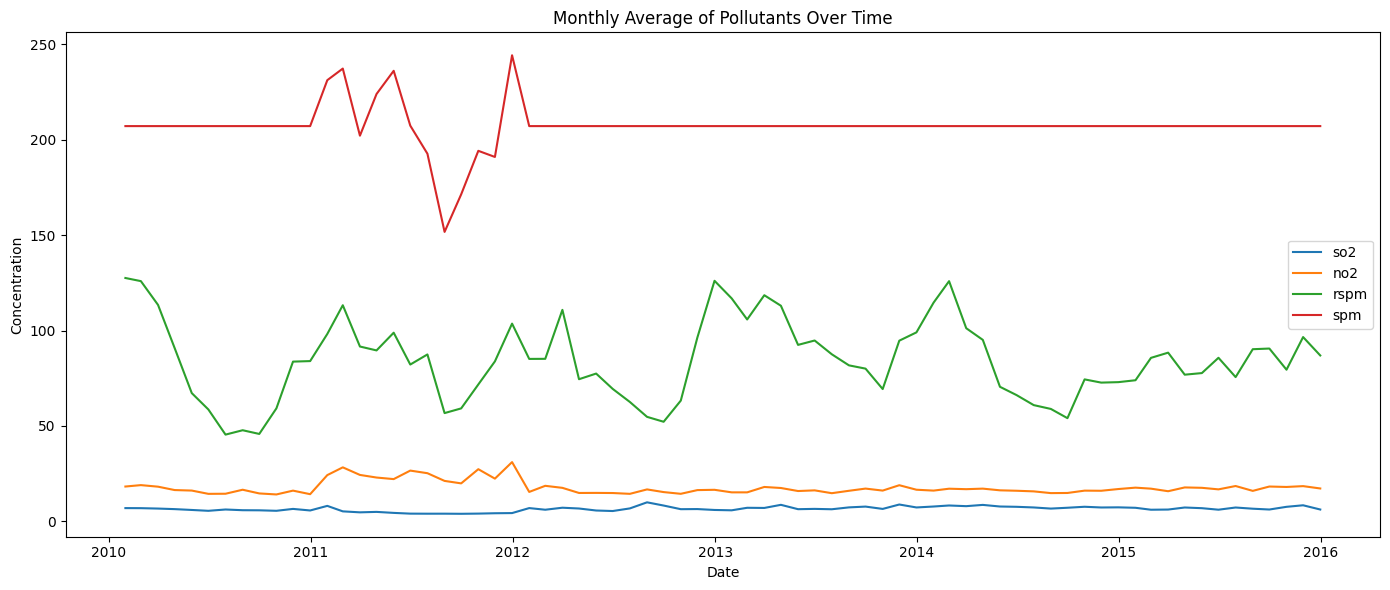

In [26]:
monthly_trend = df.set_index('date').resample('M')[pollutants].mean()

plt.figure(figsize=(14, 6))
for col in pollutants:
    plt.plot(monthly_trend.index, monthly_trend[col], label=col)

plt.title("Monthly Average of Pollutants Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.tight_layout()
plt.show()

Creates a barplot to show the average RSPM levels across states, with the x-axis representing states and the y-axis showing the average RSPM values from 2010-2015.

<ipython-input-27-fe22d531ec57>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='rspm', data=state_avg, palette='viridis')


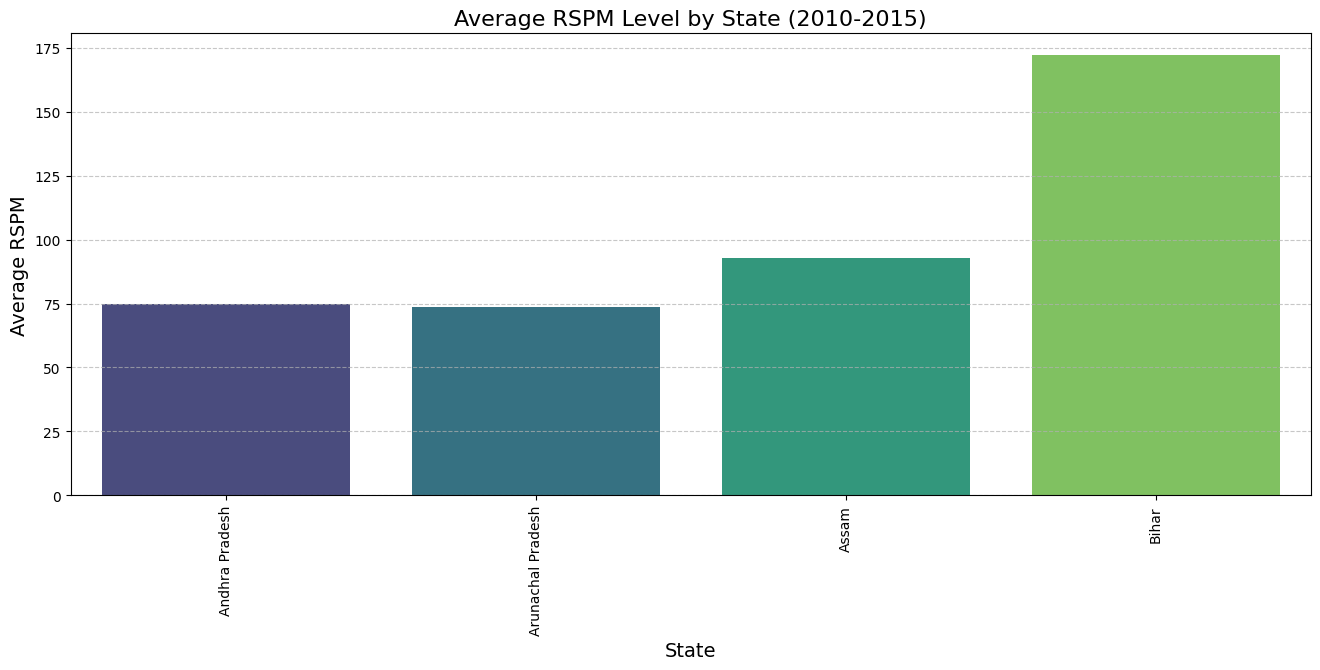

In [27]:
state_avg = df.groupby('state')[['so2', 'no2', 'rspm']].mean().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='state', y='rspm', data=state_avg, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average RSPM Level by State (2010-2015)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average RSPM', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Plots a boxplot to visualize the distribution of RSPM levels by state, showing concentration variations across different states from 2010-2015.

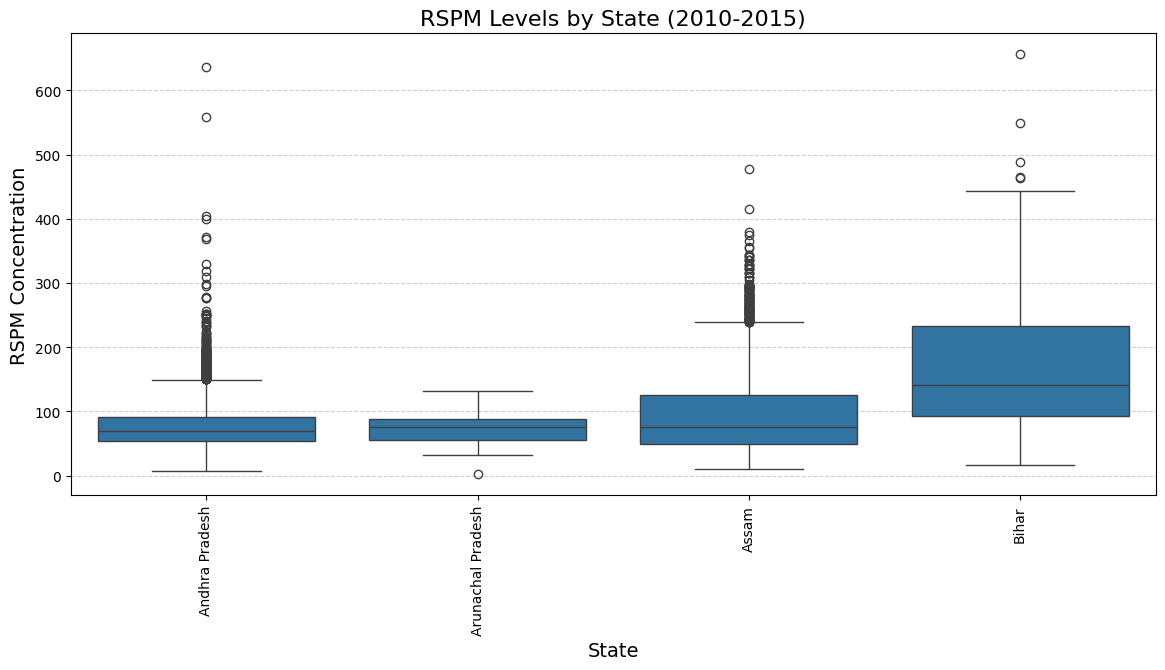

In [28]:
plt.figure(figsize=(14,6))
sns.boxplot(x='state', y='rspm', data=df)
plt.xticks(rotation=90)
plt.title('RSPM Levels by State (2010-2015)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('RSPM Concentration', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Plots a histogram with a KDE curve to show the distribution of NO2 concentrations, highlighting the frequency of different concentration levels.

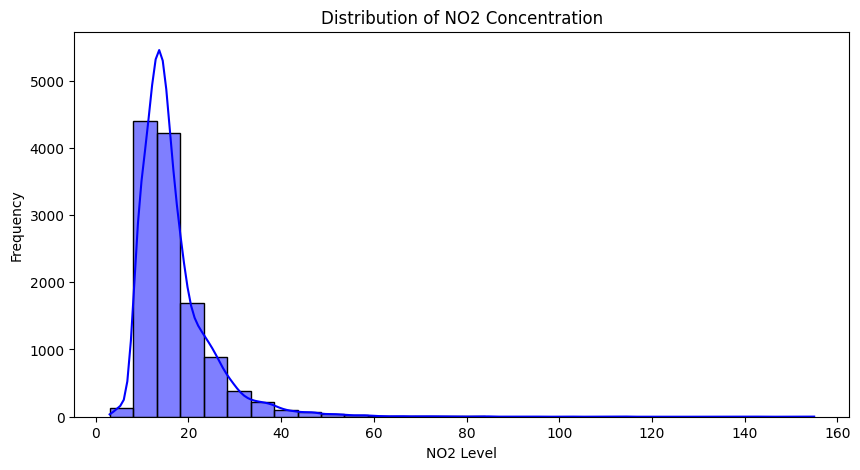

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df['no2'], kde=True, color='blue', bins=30)
plt.title('Distribution of NO2 Concentration')
plt.xlabel('NO2 Level')
plt.ylabel('Frequency')
plt.show()

Creates a barplot to display the top 10 states with the highest average NO2 concentrations, with the x-axis representing NO2 levels and the y-axis showing states.

<ipython-input-30-c6da8f1ca4bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_no2.values, y=top_no2.index, palette="viridis")


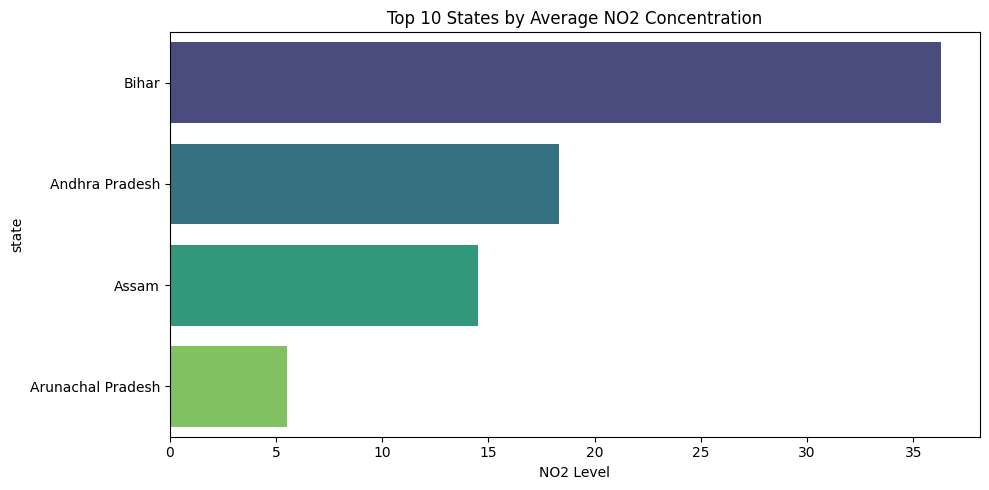

In [30]:
top_no2 = df.groupby("state")["no2"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_no2.values, y=top_no2.index, palette="viridis")
plt.title("Top 10 States by Average NO2 Concentration")
plt.xlabel("NO2 Level")
plt.tight_layout()
plt.show()

Generates a pairplot to visualize the pairwise relationships between the pollutants (so2, no2, rspm, spm), showing their interactions and correlations.